In [2]:
from fastquant import get_stock_data
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
def data_prep(data):
    df = pd.DataFrame(data=None, columns=['fracChange'])
    df['fracChange'] = (data['close']-data['open'])/data['open']

    return df

In [3]:
training_data = get_stock_data("AAPL", "2003-02-10", "2004-09-10")
testing_data = get_stock_data("AAPL", "2004-09-13", "2005-01-21")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
train = data_prep(training_data)

In [5]:
train.head()

,fracChange
dt,
2003-02-10,0.006311
2003-02-11,-0.010347
2003-02-12,0.008410
2003-02-13,0.009024
2003-02-14,0.004105


<AxesSubplot:>

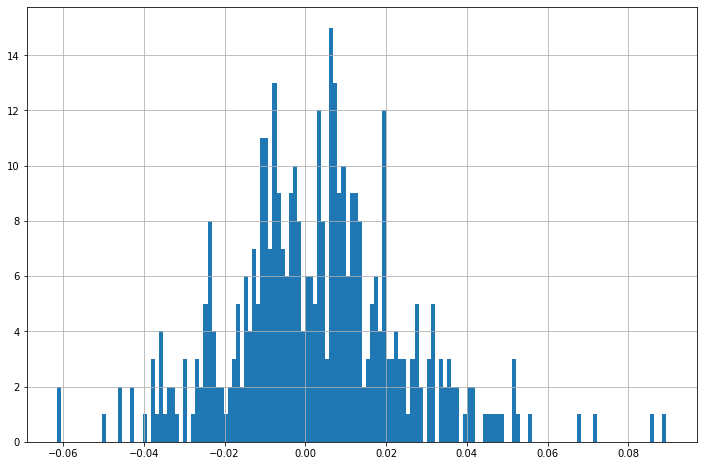

In [6]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [7]:
train['fracChange'].mean()

0.002667422083201525

In [8]:
train['fracChange'].std()

0.021241238692026366

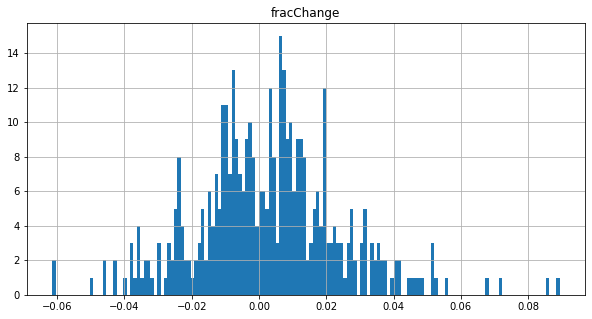

In [9]:
_ = train.hist(figsize=(10,5), bins=150)

In [10]:
test = data_prep(testing_data)

<AxesSubplot:>

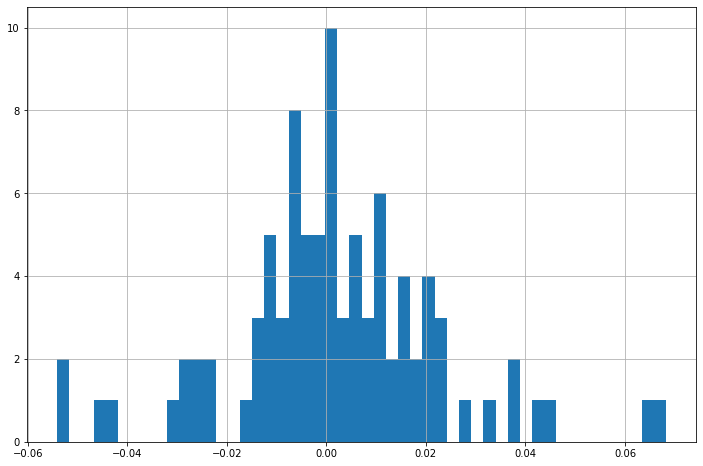

In [11]:
test['fracChange'].hist(figsize=(12,8),bins=50)

In [12]:
training_data = get_stock_data("IBM", "2003-02-10", "2004-09-10")
testing_data = get_stock_data("IBM", "2004-09-13", "2005-01-21")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
train = data_prep(training_data)

<AxesSubplot:>

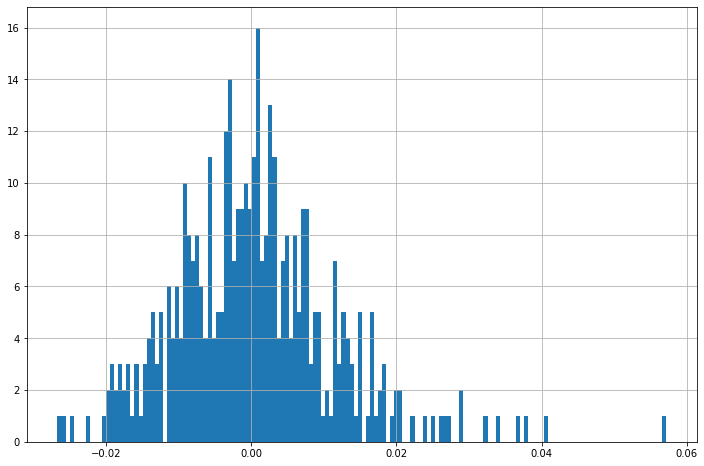

In [14]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [15]:
{'ticker':'DPZ', 'start':'2009-01-01', 'end':'2015-01-01'}

{'ticker': 'DPZ', 'start': '2009-01-01', 'end': '2015-01-01'}

In [16]:
training_data = get_stock_data("DPZ", "2009-01-01", "2015-01-01")

[*********************100%***********************]  1 of 1 completed


In [17]:
train = data_prep(training_data)

<AxesSubplot:>

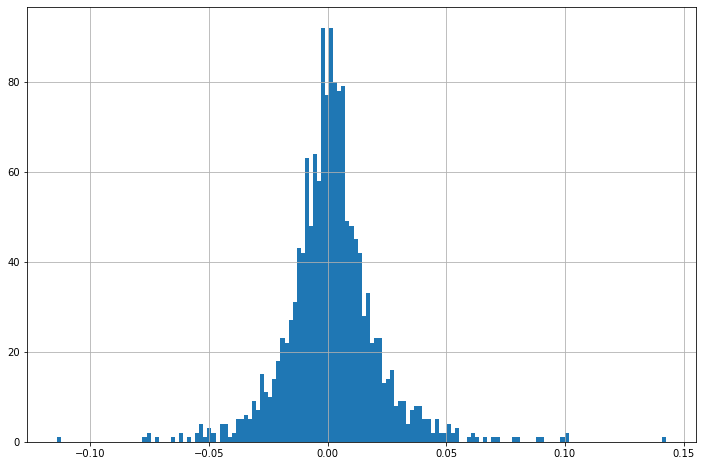

In [18]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [19]:
params = {'mu':train['fracChange'].mean(), 'std':train['fracChange'].std()}

In [20]:
samples = np.random.normal(loc=params['mu'], scale=params['std'], size=10000)

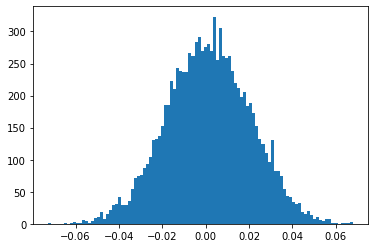

In [21]:
plt.hist(samples,bins=100)
plt.show()

In [22]:
samples.shape

(10000,)

In [23]:
np.arange(-0.2,0.2,0.4/10000).shape

(10000,)

In [24]:
training_data = get_stock_data("GME", "2019-01-01", "2021-04-22")

[*********************100%***********************]  1 of 1 completed


In [25]:
train = data_prep(training_data)

<AxesSubplot:>

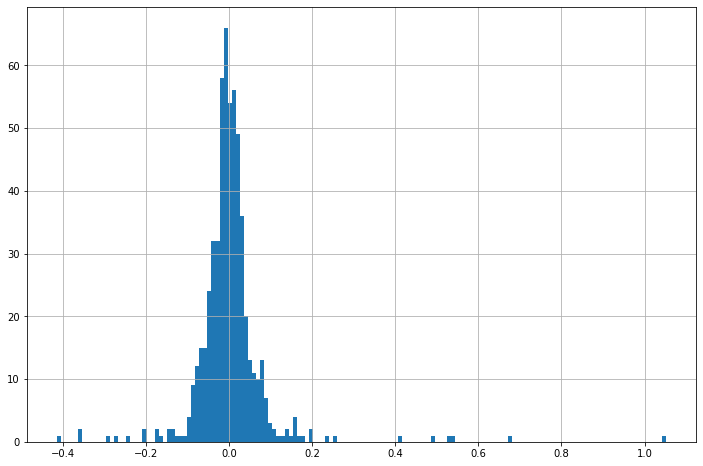

In [26]:
train['fracChange'].hist(figsize=(12,8),bins=150)

In [27]:
params = {'mu':train['fracChange'].mean(), 'std':train['fracChange'].std()}

In [28]:
samples = np.random.normal(loc=params['mu'], scale=params['std'], size=10000)

Text(0.5, 0, 'fractional change')

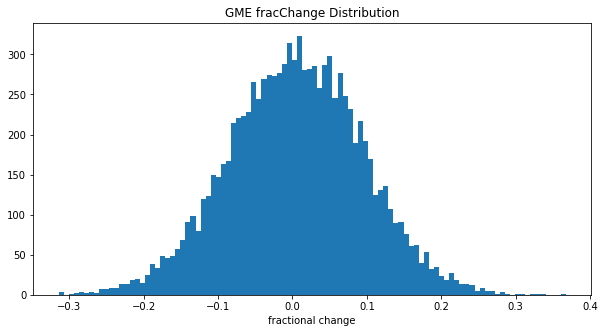

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('GME fracChange Distribution')
ax.hist(samples,bins=100)
ax.set_xlabel('fractional change')

In [30]:
def plot_hist(title, data):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_title(title)
    ax.hist(data,bins=100)
    ax.set_xlabel('fractional change')
    plt.savefig(f'../imgs/{title}.png')

[*********************100%***********************]  1 of 1 completed


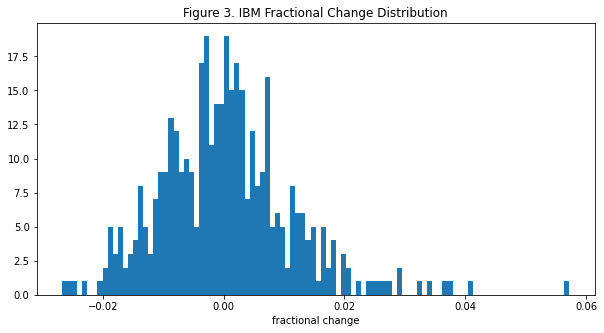

In [31]:
training_data = get_stock_data("IBM", "2003-02-10", "2004-09-10")
train = data_prep(training_data).values
plot_hist('Figure 3. IBM Fractional Change Distribution', train)

[*********************100%***********************]  1 of 1 completed


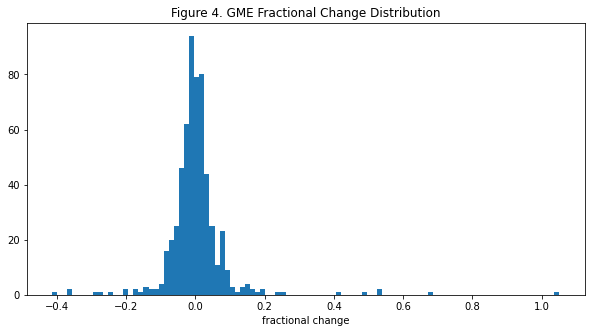

In [32]:
training_data = get_stock_data("GME", "2019-01-01", "2021-04-22")
train = data_prep(training_data).values
plot_hist('Figure 4. GME Fractional Change Distribution', train)

In [10]:
training_data = get_stock_data("AAPL", "2003-02-10", "2004-09-10")

[*********************100%***********************]  1 of 1 completed


In [11]:
train = training_data['close'].values

In [45]:
from scipy.ndimage.filters import gaussian_filter
smoothed = gaussian_filter(train, sigma=10)
smoothed_2 = gaussian_filter(train, sigma=5)

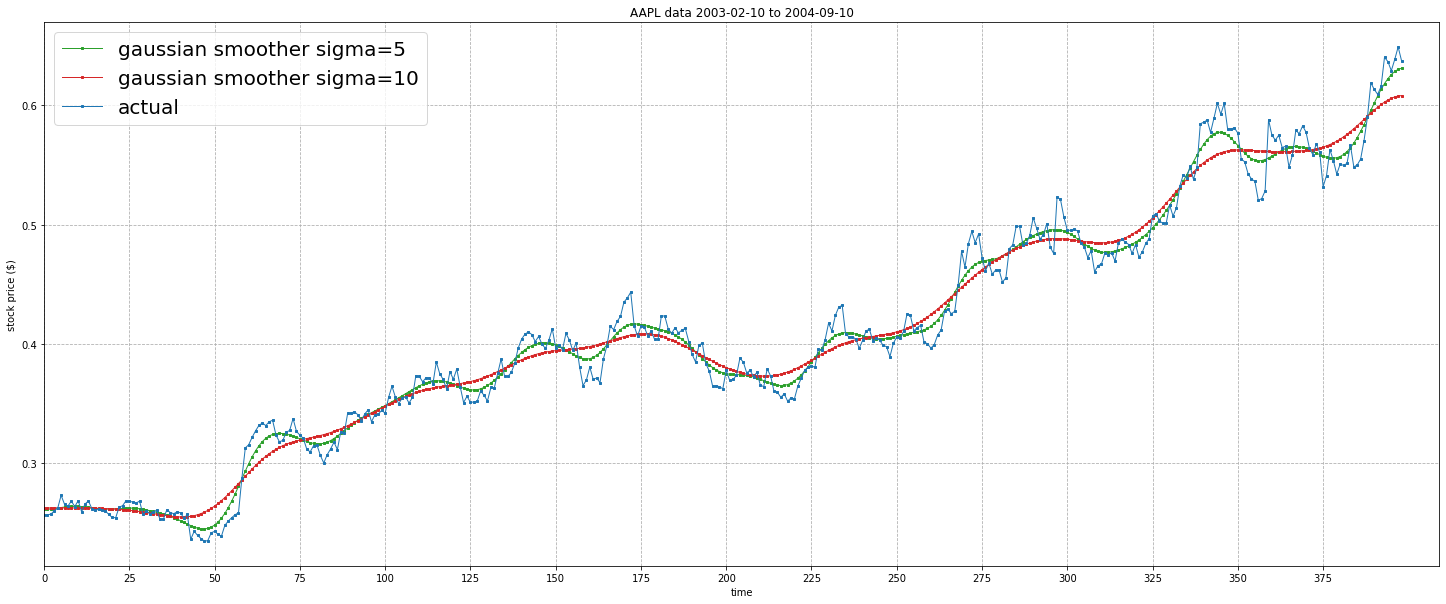

In [46]:
fig, ax = plt.subplots(figsize=(25,10))
ax.set_title('AAPL data 2003-02-10 to 2004-09-10')
time = range(len(smoothed))
ax.plot(time,smoothed_2,color='tab:green',marker='s',markersize=2,linestyle='-',linewidth=1,label='gaussian smoother sigma=5')
ax.plot(time,smoothed,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='gaussian smoother sigma=10')
ax.plot(time,train,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(smoothed),25))
ax.set_xlim(0,len(smoothed)+10,)
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend(prop={'size':20})
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(train.reshape(-1,1))
train_scale = scaler.transform(train.reshape(-1,1))

In [14]:
from scipy.ndimage.filters import gaussian_filter
smoothed = gaussian_filter(train_scale, sigma=10)
smoothed_2 = gaussian_filter(train_scale, sigma=5)

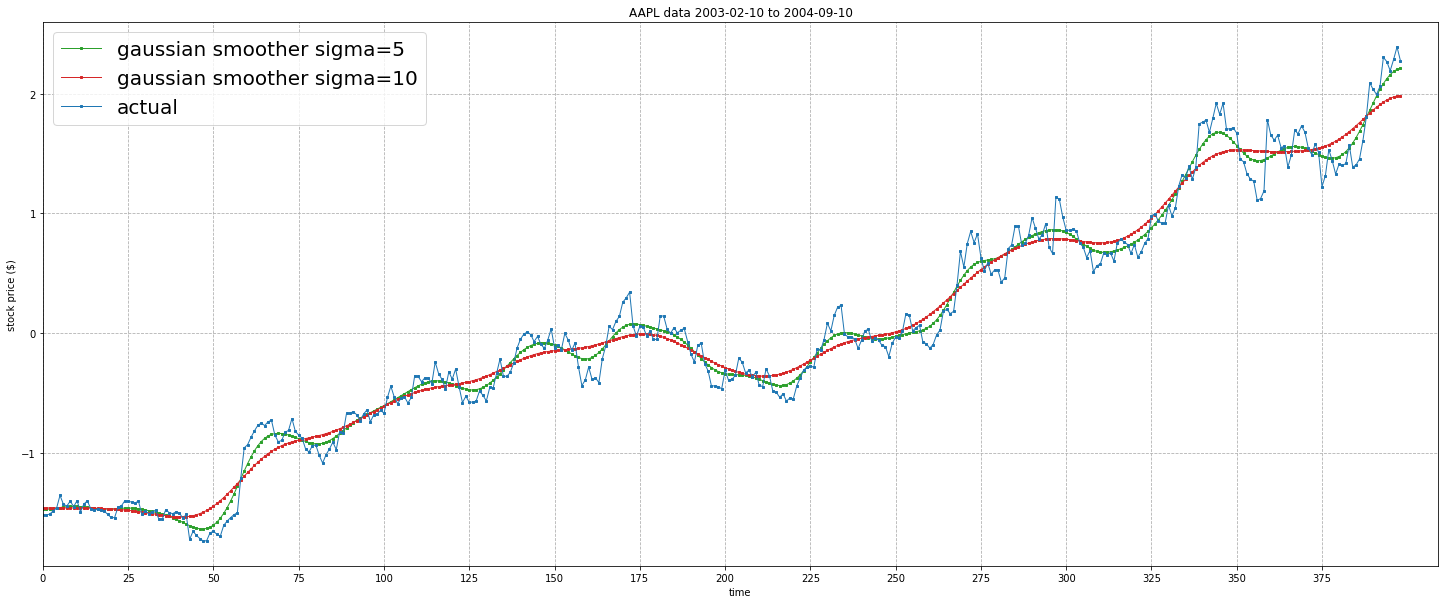

In [15]:
fig, ax = plt.subplots(figsize=(25,10))
ax.set_title('AAPL data 2003-02-10 to 2004-09-10')
time = range(len(train_scale))
ax.plot(time,smoothed_2,color='tab:green',marker='s',markersize=2,linestyle='-',linewidth=1,label='gaussian smoother sigma=5')
ax.plot(time,smoothed,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='gaussian smoother sigma=10')
ax.plot(time,train_scale,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(train_scale),25))
ax.set_xlim(0,len(train_scale)+10,)
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend(prop={'size':20})
plt.show()